Data from https://data.bitcoinity.org/markets/volume/all/USD?r=day&t=b and https://www.coindesk.com/price/

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (14, 6)
matplotlib.style.use('ggplot')

In [66]:
price = pd.read_csv('data/coindesk-bpi-USD-ohlc_data-2010-07-17_2017-09-11.csv', index_col='Date')

# To eliminate the last 2 rows, that say
# This data was produced from the CoinDesk price page.        NaN
# http://www.coindesk.com/price/                              NaN

price = price.iloc[:-2]

In [67]:
volume = pd.read_csv('Data/bitcoinity_data_bitcoin_volume_usd.csv', index_col='Time')
volume.index = pd.to_datetime(volume.index)
volume.head()

,bit-x,bitfinex,bitstamp,btce,coinbase,itbit,lakebtc,mtgox,okcoin,others
Time,,,,,,,,,,
2010-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,NaN,NaN
2010-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.01,NaN,NaN
2010-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574.00,NaN,NaN
2010-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.00,NaN,NaN
2010-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.00,NaN,NaN


In [68]:
volume['Total'] = volume.sum(axis=1)
volume.tail()

,bit-x,bitfinex,bitstamp,btce,coinbase,itbit,lakebtc,mtgox,okcoin,others,Total
Time,,,,,,,,,,,
2017-09-08,2030.337,60463.254557,23693.301623,NaN,21332.519753,4000.5739,NaN,NaN,1950.987,24726.089624,138197.063457
2017-09-09,2353.786,31028.619231,9974.388235,NaN,9863.175621,607.0597,NaN,NaN,785.002,7903.178148,62515.208934
2017-09-10,2268.153,45668.579036,14724.204144,NaN,10076.491370,1133.0560,NaN,NaN,1057.731,9207.352064,84135.566614
2017-09-11,3084.470,30796.201860,11191.595044,NaN,9058.198678,1790.9709,NaN,NaN,743.465,8313.272761,64978.174243
2017-09-12,1351.500,39957.372226,13294.437697,NaN,11987.385231,2434.6373,NaN,NaN,816.876,10060.563294,79902.771748


In [69]:
volume['Total w/o China'] = volume.Total - (volume.bitfinex.fillna(0) + volume.lakebtc.fillna(0) + volume.okcoin.fillna(0))
volume.tail()

,bit-x,bitfinex,bitstamp,btce,coinbase,itbit,lakebtc,mtgox,okcoin,others,Total,Total w/o China
Time,,,,,,,,,,,,
2017-09-08,2030.337,60463.254557,23693.301623,NaN,21332.519753,4000.5739,NaN,NaN,1950.987,24726.089624,138197.063457,75782.821900
2017-09-09,2353.786,31028.619231,9974.388235,NaN,9863.175621,607.0597,NaN,NaN,785.002,7903.178148,62515.208934,30701.587704
2017-09-10,2268.153,45668.579036,14724.204144,NaN,10076.491370,1133.0560,NaN,NaN,1057.731,9207.352064,84135.566614,37409.256578
2017-09-11,3084.470,30796.201860,11191.595044,NaN,9058.198678,1790.9709,NaN,NaN,743.465,8313.272761,64978.174243,33438.507383
2017-09-12,1351.500,39957.372226,13294.437697,NaN,11987.385231,2434.6373,NaN,NaN,816.876,10060.563294,79902.771748,39128.523522


In [70]:
volume['% non-China'] = 100 * volume['Total w/o China'] / volume.Total
volume.tail()

,bit-x,bitfinex,bitstamp,btce,coinbase,itbit,lakebtc,mtgox,okcoin,others,Total,Total w/o China,% non-China
Time,,,,,,,,,,,,,
2017-09-08,2030.337,60463.254557,23693.301623,NaN,21332.519753,4000.5739,NaN,NaN,1950.987,24726.089624,138197.063457,75782.821900,54.836782
2017-09-09,2353.786,31028.619231,9974.388235,NaN,9863.175621,607.0597,NaN,NaN,785.002,7903.178148,62515.208934,30701.587704,49.110590
2017-09-10,2268.153,45668.579036,14724.204144,NaN,10076.491370,1133.0560,NaN,NaN,1057.731,9207.352064,84135.566614,37409.256578,44.463071
2017-09-11,3084.470,30796.201860,11191.595044,NaN,9058.198678,1790.9709,NaN,NaN,743.465,8313.272761,64978.174243,33438.507383,51.461137
2017-09-12,1351.500,39957.372226,13294.437697,NaN,11987.385231,2434.6373,NaN,NaN,816.876,10060.563294,79902.771748,39128.523522,48.970170


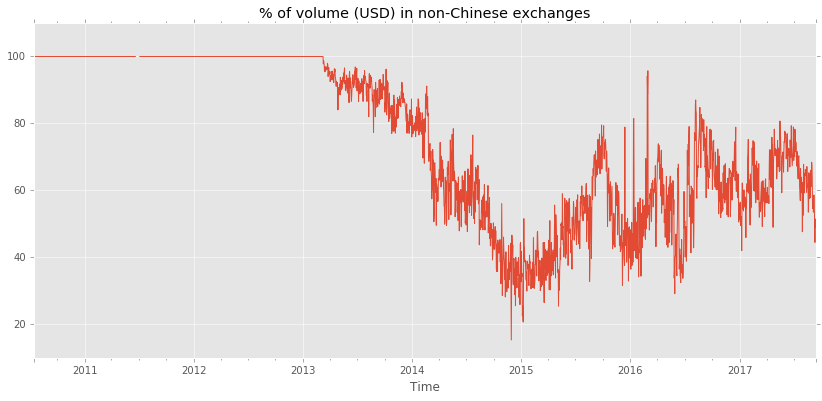

In [180]:
volume['% non-China'].plot()
plt.title('% of volume (USD) in non-Chinese exchanges')

In [72]:
volume[(volume.Total == 0)]

,bit-x,bitfinex,bitstamp,btce,coinbase,itbit,lakebtc,mtgox,okcoin,others,Total,Total w/o China,% non-China
Time,,,,,,,,,,,,,
2011-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2011-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


C:\Anaconda3\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


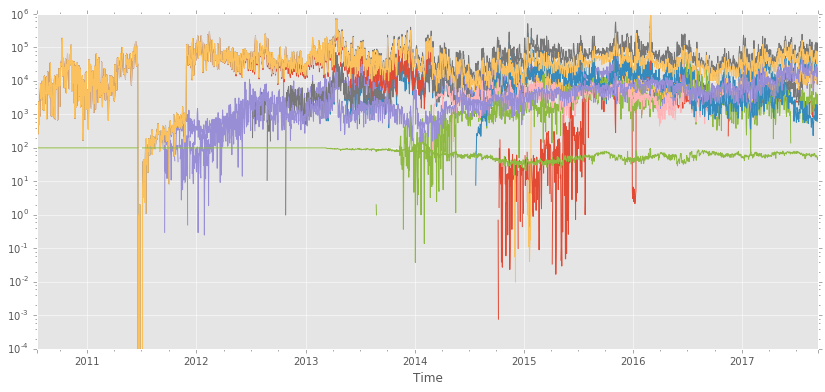

In [73]:
volume.plot(logy=True, legend=False)

In [74]:
vol = pd.DataFrame(volume['Total w/o China'])
vol.head()

,Total w/o China
Time,
2010-07-17,20.00
2010-07-18,75.01
2010-07-19,574.00
2010-07-20,262.00
2010-07-21,575.00


In [76]:
price = pd.merge(price, vol, left_index=True, right_index=True)

In [79]:
price.columns = ['Open', 'High', 'Low', 'Close', 'Volume (BTC)']
price.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)'], dtype='object')

In [80]:
price.tail()

,Open,High,Low,Close,Volume (BTC)
2017-09-07,4626.72,4691.98,4506.66,4638.10,33554.793373
2017-09-08,4638.10,4698.73,4151.64,4317.54,75782.821900
2017-09-09,4317.54,4394.52,4161.97,4291.88,30701.587704
2017-09-10,4291.88,4302.20,3976.46,4191.17,37409.256578
2017-09-11,4191.17,4334.51,4108.47,4188.84,33438.507383


In [86]:
price['Volume (USD)'] = price['Volume (BTC)'] * \
                        price[['Open', 'High', 'Low', 'Close']].mean(axis=1)
price.head()

,Open,High,Low,Close,Volume (BTC),Volume (USD)
2010-07-18,0.05,0.09,0.06,0.09,75.01,5.438225
2010-07-19,0.09,0.09,0.08,0.08,574.00,48.790000
2010-07-20,0.08,0.08,0.07,0.07,262.00,19.650000
2010-07-21,0.07,0.08,0.07,0.08,575.00,43.125000
2010-07-22,0.08,0.08,0.05,0.05,2160.00,140.400000


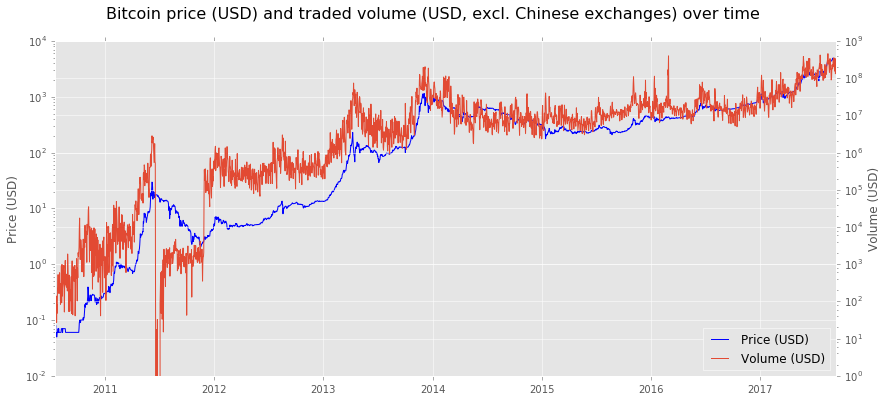

In [236]:
fig, ax = plt.subplots()

time = price.index

fig.suptitle('Bitcoin price (USD) and traded volume (USD, excl. Chinese exchanges) over time', fontsize=16)

ax.plot(time, price.Close, color='b', label='Price (USD)')
ax.set_yscale('log')
ax.set_ylabel('Price (USD)')

ax2 = ax.twinx()
vol_line = ax2.plot(time, price['Volume (USD)'], label='Volume (USD)')
ax2.set_yscale('log')
ax2.set_ylabel('Volume (USD)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# fig.legend()

# plt.figlegend(price_line, ['Price (USD)', 'Volume (USD)'], loc='lower right')

plt.show()

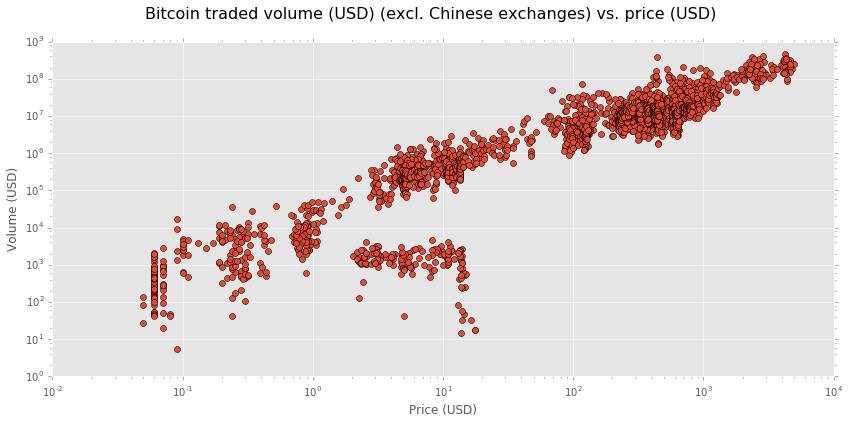

In [235]:
fig, ax = plt.subplots()
fig.suptitle('Bitcoin traded volume (USD) (excl. Chinese exchanges) vs. price (USD)', fontsize=16)
ax.plot(price.Close, price['Volume (USD)'], 'o')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Volume (USD)')
ax.set_xlabel('Price (USD)')
plt.show()
# ax.set_ylim(price['Volume (USD)'].min(), price['Volume (USD)'].max())

## Bitcoin daily returns VS volume

In [227]:
price['Daily returns'] = price.Close.pct_change(periods=1).fillna(0)
price.head(10)

,Open,High,Low,Close,Volume (BTC),Volume (USD),Daily returns
2010-07-18,0.05,0.09,0.06,0.09,75.01,5.438225,0.000000
2010-07-19,0.09,0.09,0.08,0.08,574.00,48.790000,-0.111111
2010-07-20,0.08,0.08,0.07,0.07,262.00,19.650000,-0.125000
2010-07-21,0.07,0.08,0.07,0.08,575.00,43.125000,0.142857
2010-07-22,0.08,0.08,0.05,0.05,2160.00,140.400000,-0.375000
2010-07-23,0.05,0.07,0.05,0.06,2402.50,138.143750,0.200000
2010-07-24,0.06,0.06,0.05,0.05,496.32,27.297600,-0.166667
2010-07-25,0.05,0.06,0.05,0.05,1551.48,81.452700,0.000000
2010-07-26,0.05,0.06,0.05,0.06,877.00,48.235000,0.200000
2010-07-27,0.06,0.06,0.05,0.06,3373.69,193.987175,0.000000


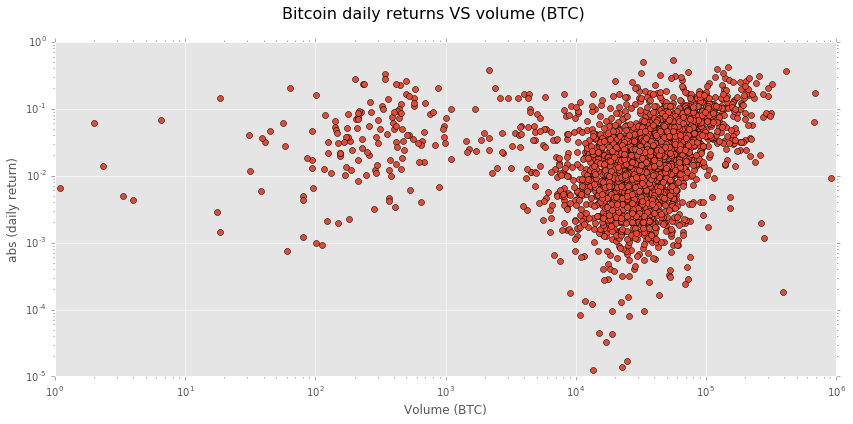

In [226]:
fig, ax = plt.subplots()
fig.suptitle('Bitcoin daily returns VS volume (BTC)', fontsize=16)
ax.plot(price['Volume (BTC)'], np.abs(price['Daily returns']), 'o')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Volume (BTC)')
ax.set_ylabel('abs (daily return)')
plt.show()
# ax.set_ylim(price['Volume (USD)'].min(), price['Volume (USD)'].max())

In [201]:
import scipy.stats as stats

In [220]:
len(price)

2613

In [219]:
len(price[price['Volume (BTC)']!=0])

2601

In [223]:
price_bueno = price[price['Daily returns'] != 0]
price_bueno = price_bueno[price_bueno['Volume (BTC)'] != 0]
len(price_bueno)

2463

In [224]:
stats.pearsonr(np.log(np.abs(price_bueno['Daily returns'])), 
               np.log(price_bueno['Volume (BTC)']))

(0.086553425638906584, 1.6970661123948964e-05)

Apparently there's a non-significant very slight (around 0.09) correlation between log(abs(return)) and log(volume)